In [1]:
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
class LinearRegression:
    def __init__(self, lr: float = 0.2, thr: float = 0.00000001, n_epochs: int = 10000000):
        self.lr = lr
        self.thr = thr
        self.n_epochs = n_epochs
        self.w = np.array([random.uniform(-5, 5),
                           random.uniform(-5, 5),
                           random.uniform(-5, 5)])
        print(f"Init w: {self.w}")

    def predict(self, X: np.ndarray) -> list:
        return X @ self.w 


    def update_w(self, X: np.array, y: np.array):
        # wk = wk - lr / m * sum((h(xi) - yi) * xik)
        # w = w - lr / m * XT @ (w @ X - y)
        m = len(y)

        h = self.predict(X)

        self.w -= self.lr / m * X.T @ (h - y)

    def fit(self, X: np.array, y: np.array):
        last_cost = 1000000
        print(f"X.shape {X.shape}, y.shape {y.shape}")

        for i in range(self.n_epochs):
            self.update_w(X, y)
            new_cost = cost(y, self.predict(X))
            print(f"{i}, {self.w}, {new_cost}")
            if last_cost - new_cost < self.thr:
                break
            last_cost = new_cost
        return self.w
            
            
def cost(y: np.array, h: np.array) -> float:
    return np.mean((h - y) ** 2) / 2

In [3]:
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df.shape

(545, 13)

# Нормалізація данних

### За допомогою MinMaxScaler()

In [5]:
scaler = MinMaxScaler()

new_df = pd.DataFrame()
new_df_price = pd.DataFrame()

new_df_price['price'] = df['price']

new_df['area'] = df['area']
new_df['bedrooms'] = df['bedrooms']
new_df['bathrooms'] = df['bathrooms']

normalize_df = scaler.fit_transform(new_df)
normalize_df_price = scaler.fit_transform(new_df_price)


In [6]:
normalize_df

array([[0.39656357, 0.6       , 0.33333333],
       [0.5024055 , 0.6       , 1.        ],
       [0.57113402, 0.4       , 0.33333333],
       ...,
       [0.13539519, 0.2       , 0.        ],
       [0.08659794, 0.4       , 0.        ],
       [0.15120275, 0.4       , 0.        ]])

In [7]:
normalize_df_price

array([[1.        ],
       [0.90909091],
       [0.90909091],
       [0.90606061],
       [0.83636364],
       [0.78787879],
       [0.72727273],
       [0.72727273],
       [0.7030303 ],
       [0.6969697 ],
       [0.6969697 ],
       [0.68666667],
       [0.65454545],
       [0.64848485],
       [0.64848485],
       [0.63636364],
       [0.63636364],
       [0.62424242],
       [0.61818182],
       [0.61515152],
       [0.60606061],
       [0.6       ],
       [0.5969697 ],
       [0.5969697 ],
       [0.59090909],
       [0.58787879],
       [0.58121212],
       [0.57575758],
       [0.57575758],
       [0.57575758],
       [0.57575758],
       [0.57575758],
       [0.56666667],
       [0.55757576],
       [0.55151515],
       [0.54813333],
       [0.54484848],
       [0.53939394],
       [0.53787879],
       [0.53333333],
       [0.53030303],
       [0.52727273],
       [0.51515152],
       [0.51515152],
       [0.5030303 ],
       [0.5030303 ],
       [0.5       ],
       [0.496

In [8]:
X = np.array(normalize_df)
y = np.array(normalize_df_price)
y = np.squeeze(normalize_df_price)

In [9]:
X

array([[0.39656357, 0.6       , 0.33333333],
       [0.5024055 , 0.6       , 1.        ],
       [0.57113402, 0.4       , 0.33333333],
       ...,
       [0.13539519, 0.2       , 0.        ],
       [0.08659794, 0.4       , 0.        ],
       [0.15120275, 0.4       , 0.        ]])

In [10]:
X.shape

(545, 3)

In [11]:
y

array([1.        , 0.90909091, 0.90909091, 0.90606061, 0.83636364,
       0.78787879, 0.72727273, 0.72727273, 0.7030303 , 0.6969697 ,
       0.6969697 , 0.68666667, 0.65454545, 0.64848485, 0.64848485,
       0.63636364, 0.63636364, 0.62424242, 0.61818182, 0.61515152,
       0.60606061, 0.6       , 0.5969697 , 0.5969697 , 0.59090909,
       0.58787879, 0.58121212, 0.57575758, 0.57575758, 0.57575758,
       0.57575758, 0.57575758, 0.56666667, 0.55757576, 0.55151515,
       0.54813333, 0.54484848, 0.53939394, 0.53787879, 0.53333333,
       0.53030303, 0.52727273, 0.51515152, 0.51515152, 0.5030303 ,
       0.5030303 , 0.5       , 0.4969697 , 0.49393939, 0.49090909,
       0.49090909, 0.49090909, 0.48484848, 0.48484848, 0.48484848,
       0.48484848, 0.48424242, 0.47575758, 0.47272727, 0.47272727,
       0.46666667, 0.46060606, 0.46060606, 0.45757576, 0.45454545,
       0.44848485, 0.44848485, 0.44545455, 0.44242424, 0.43636364,
       0.43636364, 0.43333333, 0.43030303, 0.42727273, 0.42424

In [12]:
y.shape

(545,)

In [13]:
copy_X = np.copy(X)
for i in range(len(X)):
    copy_X[i] = [1] + copy_X[i]

copy_X

array([[1.39656357, 1.6       , 1.33333333],
       [1.5024055 , 1.6       , 2.        ],
       [1.57113402, 1.4       , 1.33333333],
       ...,
       [1.13539519, 1.2       , 1.        ],
       [1.08659794, 1.4       , 1.        ],
       [1.15120275, 1.4       , 1.        ]])

# Навчання за допомогою self class

In [14]:
linear_regression = LinearRegression()

w_lr = linear_regression.fit(X, y)

Init w: [3.41332912 0.62815895 2.05977844]
X.shape (545, 3), y.shape (545,)
0, [3.35006246 0.54222086 2.02743893], 0.6235571129790237
1, [3.28967148 0.46085249 1.99649416], 0.5688276111686253
2, [3.23201288 0.38382346 1.96687509], 0.5194122987673949
3, [3.17695059 0.31091495 1.93851615], 0.47479130833226635
4, [3.12435533 0.24191912 1.91135505], 0.4344956590663438
5, [3.07410433 0.17663857 1.88533262], 0.3981022756047419
6, [3.02608096 0.11488583 1.86039266], 0.3652294944054839
7, [2.98017447 0.05648283 1.83648179], 0.33553301001437097
8, [2.93627963e+00 1.26043983e-03 1.81354931e+00], 0.30870221814507487
9, [ 2.89429652 -0.05094196  1.79154703], 0.2844569167306803
10, [ 2.85413022 -0.10027692  1.77042923], 0.26254432990527266
11, [ 2.81569057 -0.14688935  1.75015243], 0.242736423304327
12, [ 2.77889194 -0.19091687  1.73067536], 0.22482748216704565
13, [ 2.74365298 -0.23249017  1.7119588 ], 0.20863192651526982
14, [ 2.70989644 -0.27173341  1.69396551], 0.19398234020181906
15, [ 2.67754

916, [0.57485549 0.2104969  0.3678088 ], 0.00686329310625233
917, [0.57463459 0.21066556 0.36770381], 0.006862852615924774
918, [0.57441451 0.21083358 0.36759926], 0.006862415451616648
919, [0.57419524 0.21100097 0.36749513], 0.006861981588186905
920, [0.57397679 0.21116772 0.36739143], 0.006861551000684791
921, [0.57375915 0.21133384 0.36728815], 0.006861123664348404
922, [0.57354232 0.21149933 0.3671853 ], 0.006860699554603257
923, [0.57332629 0.2116642  0.36708287], 0.006860278647060866
924, [0.57311106 0.21182844 0.36698086], 0.006859860917517332
925, [0.57289664 0.21199206 0.36687927], 0.006859446341951944
926, [0.572683   0.21215506 0.36677809], 0.006859034896525792
927, [0.57247017 0.21231745 0.36667733], 0.006858626557580388
928, [0.57225812 0.21247922 0.36657698], 0.006858221301636295
929, [0.57204685 0.21264038 0.36647704], 0.006857819105391777
930, [0.57183637 0.21280093 0.36637751], 0.006857419945721443
931, [0.57162668 0.21296087 0.3662784 ], 0.006857023799674918
932, [0.5

# Аналітичне рішення

In [15]:
w = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'w -->: {w}')

w -->: [0.51550397 0.25511989 0.34191443]


In [16]:
X[:, 0].shape

(545,)

In [17]:
y.shape

(545,)

# Реалізація за допомогою sklearn

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
linear_regression = LinearRegression()


linear_regression.fit(X, y)

cost(y, linear_regression.predict(X))

0.006713405108514905

In [21]:
linear_regression

LinearRegression()

In [22]:
linear_regression.intercept_, linear_regression.coef_

(0.04282739976995403, array([0.47714269, 0.17611257, 0.36001286]))

# Графік лінійної регресії

In [18]:
def predict(w0, w1, w2, x):
    return w0 + w1 * x + w2 * x

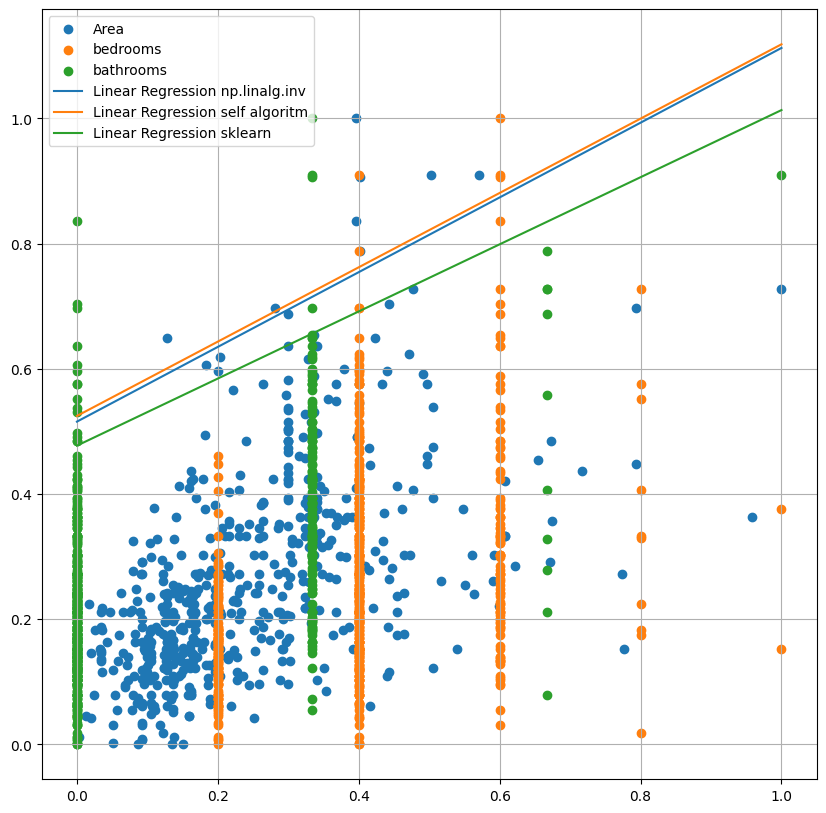

In [25]:
plt.figure(figsize=(10, 10))

plt.scatter(X[:, 0], y, label='Area')
plt.scatter(X[:, 1], y, label='bedrooms')
plt.scatter(X[:, 2], y, label='bathrooms')

plt.plot([0,1], [predict(w[0], w[1], w[2], i) for i in [0,1]], label='Linear Regression np.linalg.inv')
plt.plot([0,1], [predict(w_lr[0], w_lr[1], w_lr[2], i) for i in [0,1]], label='Linear Regression self algoritm')
plt.plot([0,1], [predict(linear_regression.coef_[0], linear_regression.coef_[1], linear_regression.coef_[2], i) for i in [0,1]], label='Linear Regression sklearn')

plt.legend()

plt.grid()

In [24]:
print('Сonclusion:')
print(f'self class: w0 = {w_lr[0]}, w1 = {w_lr[1]}, w2 = {w_lr[2]}')
print(f'analytical: w0 = {w[0]}, w1 = {w[1]}, w2 = {w[2]}')
print(f'sklearn   : w0 = {linear_regression.coef_[0]}, w1 = {linear_regression.coef_[1]}, w2 = {linear_regression.coef_[2]}')

Сonclusion:
self class: w0 = 0.524591740031809, w1 = 0.2484427358058051, w2 = 0.3453597980809125
analytical: w0 = 0.5155039734908652, w1 = 0.2551198931050844, w2 = 0.341914425414621
sklearn   : w0 = 0.47714268958123424, w1 = 0.17611256873124737, w2 = 0.36001285656909054
